# Name: Nisrin Dhoondia

GitHub: https://github.com/mygoal-javadeveloper

Kaggle: https://www.kaggle.com/nisrindhoondia

My Portfolio (Github and others): https://linktr.ee/nisrindhoondia


# The Sparks Foundation

# GRIP: Data Science & Business Analytics

# Stock Market Prediction using Numerical and Textual Analysis

# Task 7

**Stock to analyze and predict SENSEX (S&P BSE SENSEX)**

# Objective: 

**Create a hybrid model for stock price/performance prediction
using numerical analysis of historical stock prices and sentimental analysis of
news headlines.** 

# What we will learn?

  * Analyzing time series data, the movement of prices and volume of BSE index using rolling window, calculate the percentage change between the current and a prior element using pct_change() function and etc
  * About Altair which is a declarative statistical visualization library for Python
  * Plot Partial Autocorrelation and understand the graph
  * Textual Analysis of news from Times of India News Headlines to determine the sentiment - whether it is a positive text or negative or neutral. And also determine whether the text contains personal opinion or has factual information.
  * Based on both analysis data we will predict the stock price ((high+low+close)/3) and closing price of BSE index
  * Prepare a dataset for training the model to predict tomorrow's stock price ((high+low+close)/3) and closing price of BSE index of which we have no independent variables (we donot have the prices of tomorrow nor we know what will be the news of the day)   
  * We will also learn 
      * What is Multioutput Regression model?
      * Which are the two different types of Multioutput Regression models?
      * Which Multioutput Regression model to select? and 
      * How to predict price ((high+low+close)/3) and closing price of BSE index using Multioutput Regression model?

# How I resolved the challenges I faced while working on this task:

  * I didn't knew how to download the dataset from [yahoo finance](<https://finance.yahoo.com/?guccounter=1>), so I learnt which ticker module to install and how to go about
  * The ticker symbol of S&P BSE SENSEX was not working for downloading the BSE index dataset, so I learnt and found '^BSESN' through which I can download the dataset
  * The dataset of Times of India News Headlines for textual analysis is very big dataset, which when I downloaded and open in excel I used to get this error 'File not loaded completely'. Because excel has a limit to number of rows and columns in one sheet, and this dataset exceed the 1048576 rows limit of excl sheet. So though the dataset had start date 1st Jan 2001 and end date 30th June 2020 but I was only able to access 1st Jan 2001 to 07th Feb 2011. I needed dataset from 1st Jan 2015 to at least till 30th June 2020, as I was working on the BSE index dataset from 1st Jan 2015 to 03rd Nov 2020. I later found and resolved it to make it workable for my this task to complete. Watch my YouTube video, please click [here](<https://youtu.be/gPI38lcj3U8>) to find how I resolved and got the Times of India News Headlines dataset for this task.





In [1]:
pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 5.5MB 7.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=322bfdc619273bcce1df5d2d10c9fad83b814f42835f491f1e8a717bc2a627d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-3qm0jqcn/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#import libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import yfinance as yf
# bse_data = yf.download('^BSESN', start='2015-01-01', end='2020-11-03')
# unseenbse_data = yf.download('^BSESN', start='2020-11-03', end='2020-11-04')

In [5]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2015-01-01', end='2020-06-30')
#since our Textual Analysis dataset containing news from Times of India News Headlines is only till 30th June 2020. 
#So we will assume today is 29th June 2020 and tomorrow is 30th June 2020. And we have to predict the stock price ((high+low+close)/3) and closing price of BSE index 
#for tomorrow 30th June 2020.
unseenbse_data = yf.download('^BSESN', start='2020-06-30', end='2020-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
unseenbse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [9]:
unseenbse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [10]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1345 entries, 2015-01-02 to 2020-06-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1345 non-null   float64
 1   high      1345 non-null   float64
 2   low       1345 non-null   float64
 3   close     1345 non-null   float64
 4   adjclose  1345 non-null   float64
 5   volume    1345 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.6 KB


In [11]:
unseenbse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2020-06-30 to 2020-06-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1 non-null      float64
 1   high      1 non-null      float64
 2   low       1 non-null      float64
 3   close     1 non-null      float64
 4   adjclose  1 non-null      float64
 5   volume    1 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 56.0 bytes


In [12]:
bse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [13]:
bse_data.tail()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800
2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300


In [14]:
unseenbse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [15]:
bse_data.reset_index(inplace=True)

In [16]:
bse_data.rename(columns={'Date': 'date'}, inplace = True)

In [17]:
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [18]:
unseenbse_data.reset_index(inplace=True)

In [19]:
unseenbse_data.rename(columns={'Date': 'date'}, inplace = True)

In [20]:
unseenbse_data.head()

,date,open,high,low,close,adjclose,volume
0,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [21]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format = '%Y%m%d')

In [22]:
unseenbse_data['date'] = pd.to_datetime(unseenbse_data['date'], format = '%Y%m%d')

In [23]:
#before moving forward let us calculate first the actual price
unseenbsedata_price = round((unseenbse_data['high'] + unseenbse_data['low'] + unseenbse_data['close'])/ 3, 2)
unseenbsedata_price  #actual price

0    34987.5
dtype: float64

# Rolling window analysis of time series

Creating 4,16, 52 week moving average of closing price of BSE index


In [24]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'date': df['date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()

In [25]:
stock_weekmovingavg(4, bse_data).head()

,close,movingavg
date,,
2015-02-02,29122.269531,28256.509570
2015-02-03,29000.140625,28318.228027
2015-02-04,28883.109375,28376.119043
2015-02-05,28850.970703,28470.901465
2015-02-06,28717.910156,28568.008984


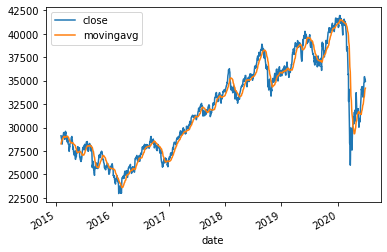

In [26]:
stock_weekmovingavg(4, bse_data).plot()

In [27]:
altdata_fourweek = stock_weekmovingavg(4, bse_data)
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.rename(columns={list(altdata_fourweek)[0]:'date'}, inplace=True)

In [28]:
alt.Chart(altdata_fourweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

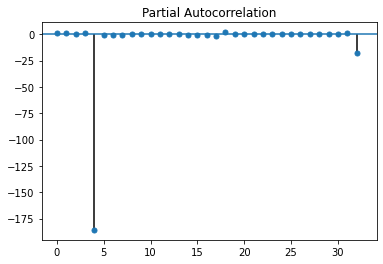

In [29]:
plotfourweek = altdata_fourweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fourweek['date']))) 
del plotfourweek['date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 4 and 32. Since it is less than 0 and more than -1 so 4 and 32 represents a perfect negative correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions (which is not vividly seen in the above plot)

In [30]:
stock_weekmovingavg(16, bse_data).head()

,close,movingavg
date,,
2015-05-05,27440.140625,28447.880933
2015-05-06,26717.369141,28442.283936
2015-05-07,26599.109375,28428.222046
2015-05-08,27105.390625,28423.367651
2015-05-11,27507.300781,28425.824780


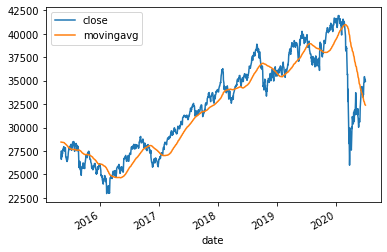

In [31]:
stock_weekmovingavg(16, bse_data).plot()

In [32]:
altdata_sixteenweek = stock_weekmovingavg(16, bse_data)
altdata_sixteenweek.reset_index(inplace=True)
altdata_sixteenweek.rename(columns={list(altdata_sixteenweek)[0]:'date'}, inplace=True)

In [33]:
alt.Chart(altdata_sixteenweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

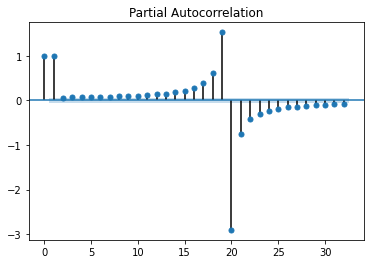

In [34]:
plotsixteenweek = altdata_sixteenweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotsixteenweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_sixteenweek['date']))) 
del plotsixteenweek['date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28.
Where 0, 1, 19 represents a perfect positive correlation and 20 represents a perfect negative correlation.
While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions (which is not vividly seen in the above plot)

In [35]:
stock_weekmovingavg(52, bse_data).head()

,close,movingavg
date,,
2016-01-25,24485.949219,27198.907963
2016-01-27,24492.390625,27185.823535
2016-01-28,24469.570312,27172.939190
2016-01-29,24870.689453,27163.254995
2016-02-01,24824.830078,27155.416031


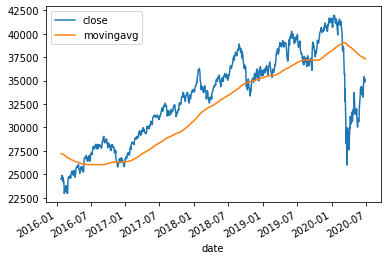

In [36]:
stock_weekmovingavg(52, bse_data).plot()

In [37]:
altdata_fiftytwoweek = stock_weekmovingavg(52, bse_data)
altdata_fiftytwoweek.reset_index(inplace=True)
altdata_fiftytwoweek.rename(columns={list(altdata_fiftytwoweek)[0]:'date'}, inplace=True)

In [38]:
alt.Chart(altdata_fiftytwoweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

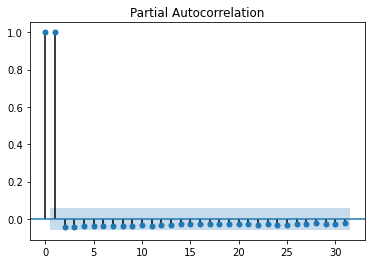

In [39]:
plotfiftytwoweek = altdata_fiftytwoweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfiftytwoweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fiftytwoweek['date']))) 
del plotfiftytwoweek['date']
sm.graphics.tsa.plot_pacf(plotfiftytwoweek.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 1 representing a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions 

## Creating a rolling window of size 10 and 50 of the BSE index

In [40]:
def rollingwindows(days, df):
  data = df.filter(['date','open','high','low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  rollingwindows_data = data.rolling(window=days).mean().shift()
  return rollingwindows_data.dropna()

In [41]:
rollingwindows(10, bse_data).head()

,open,high,low,close
date,,,,
2015-01-16,27515.904883,27657.483008,27279.612891,27479.296484
2015-01-19,27569.437891,27681.345898,27322.217969,27502.695508
2015-01-20,27596.578906,27708.302930,27363.268945,27544.664453
2015-01-21,27659.640820,27821.338867,27502.047852,27724.385352
2015-01-22,27845.606836,28011.988867,27703.692969,27922.389258


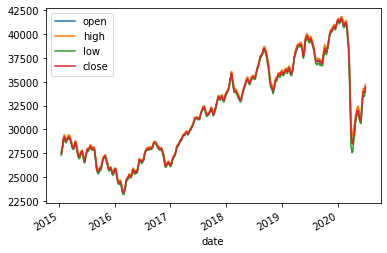

In [42]:
rollingwindows(10, bse_data).plot()

In [43]:
altdata_tendays = rollingwindows(10, bse_data)
altdata_tendays.reset_index(inplace=True)
altdata_tendays.rename(columns={list(altdata_tendays)[0]:'date'}, inplace=True)

In [44]:
alt.Chart(altdata_tendays).mark_point().encode(
    x ='date',
    y = 'close'
)

alt.Chart(...)

In [45]:
rollingwindows(50, bse_data).head()

,open,high,low,close
date,,,,
2015-03-18,28721.847383,28863.956836,28502.767422,28670.602461
2015-03-19,28746.759180,28881.346836,28523.317422,28685.286836
2015-03-20,28763.295000,28899.631836,28535.814414,28697.833828
2015-03-23,28778.719180,28915.340430,28561.266406,28723.306211
2015-03-24,28805.396367,28942.011250,28589.022031,28748.970195


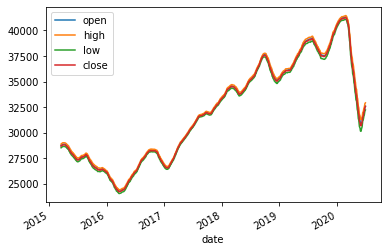

In [46]:
rollingwindows(50, bse_data).plot()

In [47]:
altdata_fiftydays = rollingwindows(50, bse_data)
altdata_fiftydays.reset_index(inplace=True)
altdata_fiftydays.rename(columns={list(altdata_fiftydays)[0]:'date'}, inplace=True)

In [48]:
alt.Chart(altdata_fiftydays).mark_point().encode(
    x='date',
    y='close'
)

alt.Chart(...)

# Creating the dummy time series:

Volume shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day. ( 0/1 dummy-coding is for direction of shock)

In [49]:
def boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  #percentage change compare to previous volume using pct_change() function
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [50]:
boolean_shock(10, bse_data, 'volume')

,percentchg,shock
date,,
2015-01-05,24.324324,1
2015-01-06,53.260870,1
2015-01-07,-13.475177,0
2015-01-08,-32.786885,0
2015-01-09,35.365854,1
...,...,...
2020-06-23,0.398406,0
2020-06-24,5.555556,0
2020-06-25,-7.518797,0


In [51]:
altdata_volpercentchg = boolean_shock(10, bse_data, 'volume')
altdata_volpercentchg.reset_index(inplace=True)
altdata_volpercentchg.rename(columns={list(altdata_volpercentchg)[0]:'date'}, inplace=True)

In [52]:
alt.Chart(altdata_volpercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

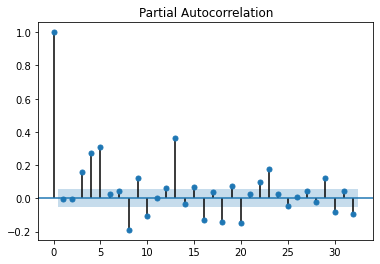

In [53]:
plotvolpercentchg = altdata_volpercentchg.filter(['date', 'percentchg'], axis=1) #df.copy()
plotvolpercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_volpercentchg['date']))) 
del plotvolpercentchg['date']
sm.graphics.tsa.plot_pacf(plotvolpercentchg.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 3, 4, 5, 8, 9. 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 29, 30, 32. And lag value 0 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions

In [54]:
boolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2015-01-05,-0.163440,0
2015-01-06,-3.070360,0
2015-01-07,-0.291397,0
2015-01-08,1.359742,0
2015-01-09,0.673407,0
...,...,...
2020-06-23,1.486937,0
2020-06-24,-1.584653,0
2020-06-25,-0.077085,0


In [55]:
altdata_closepercentchg2 = boolean_shock(2, bse_data, 'close')
altdata_closepercentchg2.reset_index(inplace=True)
altdata_closepercentchg2.rename(columns={list(altdata_closepercentchg2)[0]:'date'}, inplace=True)

In [56]:
alt.Chart(altdata_closepercentchg2).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

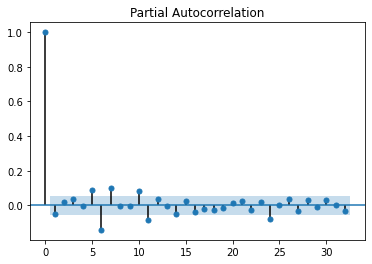

In [57]:
plotclosepercentchg2 = altdata_closepercentchg2.filter(['date', 'percentchg'], axis=1) #df.copy()
plotclosepercentchg2.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_closepercentchg2['date']))) 
del plotclosepercentchg2['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg2.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 5, 6, 7, 10, 11, 24. And lag value 0 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions

In [58]:
boolean_shock(10, bse_data, 'close')

,percentchg,shock
date,,
2015-01-05,-0.163440,0
2015-01-06,-3.070360,0
2015-01-07,-0.291397,0
2015-01-08,1.359742,0
2015-01-09,0.673407,0
...,...,...
2020-06-23,1.486937,0
2020-06-24,-1.584653,0
2020-06-25,-0.077085,0


In [59]:
altdata_closepercentchg10 = boolean_shock(10, bse_data, 'close')
altdata_closepercentchg10.reset_index(inplace=True)
altdata_closepercentchg10.rename(columns={list(altdata_closepercentchg10)[0]:'date'}, inplace=True)

In [60]:
alt.Chart(altdata_closepercentchg10).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

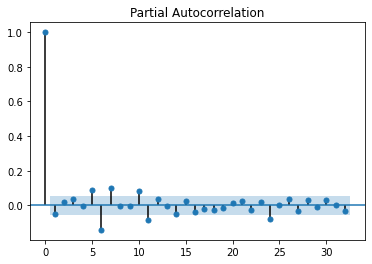

In [61]:
plotclosepercentchg10 = altdata_closepercentchg10.filter(['date', 'percentchg'], axis=1) #df.copy()
plotclosepercentchg10.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_closepercentchg10['date']))) 
del plotclosepercentchg10['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg10.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 5, 6, 7, 10, 11, 24. And lag value 0 represents a perfect positive correlation. While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions

## Pricing shock without volume shock

In [62]:
def priceboolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['date'])
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['priceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  return data

In [63]:
priceboolean_shock(10, bse_data)

,priceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,0
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


In [64]:
altdata_pricepercentchg = priceboolean_shock(10, bse_data)
altdata_pricepercentchg.reset_index(inplace=True)
altdata_pricepercentchg.rename(columns={list(altdata_pricepercentchg)[0]:'date'}, inplace=True)

In [65]:
alt.Chart(altdata_pricepercentchg).mark_point().encode(
    x='date',
    y='priceavg'
)

alt.Chart(...)

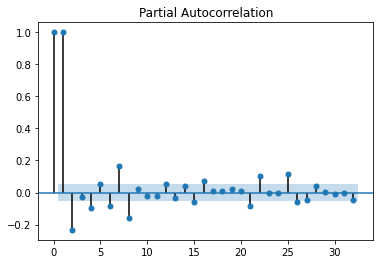

In [66]:
plotpricepercentchg = altdata_pricepercentchg.filter(['date', 'priceavg'], axis=1) #df.copy()
plotpricepercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_pricepercentchg['date']))) 
del plotpricepercentchg['date']
sm.graphics.tsa.plot_pacf(plotpricepercentchg.values.squeeze())
plt.show()

In the partial autocorrelation plot above, we have statistically significant partial autocorrelations at lag values 0, 1, 2, 4, 6, 7, 8, 15, 16, 21, 22, 25, 26. And lag values 0, 1 represents a perfect positive correlation.  While the rest of values are very close to 0 and under the confidence intervals, which are represented as blue shaded regions

## Creating the reverse dummy time series:

Price shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [67]:
def reverseboolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['percentchg'] = (data[col].pct_change()) * 100
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [68]:
reverseboolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,1
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2020-06-22,-1.465151,0
2020-06-23,1.610168,0
2020-06-24,0.077145,0


In [69]:
altdata_closepercentchg = reverseboolean_shock(2, bse_data, 'close')
altdata_closepercentchg.reset_index(inplace=True)
altdata_closepercentchg.rename(columns={list(altdata_closepercentchg)[0]:'date'}, inplace=True)

In [70]:
alt.Chart(altdata_closepercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

Pricing black swan : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 5%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [71]:
reverseboolean_shock(5, bse_data, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,0
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2020-06-22,-1.465151,0
2020-06-23,1.610168,0
2020-06-24,0.077145,0


In [72]:
altdata_closepercentchg5 = reverseboolean_shock(5, bse_data, 'close')
altdata_closepercentchg5.reset_index(inplace=True)
altdata_closepercentchg5.rename(columns={list(altdata_closepercentchg5)[0]:'date'}, inplace=True)

In [73]:
alt.Chart(altdata_closepercentchg5).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

Pricing shock without volume shock : Now we will be creating a time series for pricing shock without volume shock based on whether price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()



In [74]:
def pricereverseboolean_shock(percent, df):
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['reversepriceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['reversepriceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [75]:
pricereverseboolean_shock(2, bse_data)

,reversepriceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,1
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


In [76]:
altdata_reversepricepercentchg = pricereverseboolean_shock(2, bse_data)
altdata_reversepricepercentchg.reset_index(inplace=True)
altdata_reversepricepercentchg.rename(columns={list(altdata_reversepricepercentchg)[0]:'date'}, inplace=True)

In [77]:
alt.Chart(altdata_reversepricepercentchg).mark_point().encode(
    x='date',
    y='reversepriceavg'
)

alt.Chart(...)

# Textual Analysis of news from Times of India News Headlines

In [78]:
#import library
from google.colab import files
#upload the csv file to be use
uploaded = files.upload()

Saving newdata.csv to newdata.csv


In [79]:
#reading the uploaded csv file and assigning to news variable
news  = pd.read_csv('newdata.csv')

In [80]:
#getting the overview of all the columns in the news dataset
news.columns

Index(['Unnamed: 0', 'publish_date', 'headline_category', 'headline_text'], dtype='object')

In [81]:
#finding the total rows and columns of news dataset
news.shape

(1292805, 4)

In [82]:
#first 5 rows content of the dataset
news.head()

,Unnamed: 0,publish_date,headline_category,headline_text
0,2004367,20150101,life-style.food.recipes,Breakfast recipe for diabetics: Moong idlis
1,2004368,20150101,life-style.food.recipes,Recipe: Delicious coconut balls
2,2004369,20150101,life-style.beauty,Cure that dandruff naturally
3,2004370,20150101,life-style.food.recipes,Recipe: Kerala Chicken curry
4,2004371,20150101,life-style.food.drinks-corner,Recipe: Mocha Coffee


In [83]:
#converting publish_date column to 
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [84]:
#first 5 rows content of the dataset
news.head()

,Unnamed: 0,publish_date,headline_category,headline_text
0,2004367,2015-01-01,life-style.food.recipes,Breakfast recipe for diabetics: Moong idlis
1,2004368,2015-01-01,life-style.food.recipes,Recipe: Delicious coconut balls
2,2004369,2015-01-01,life-style.beauty,Cure that dandruff naturally
3,2004370,2015-01-01,life-style.food.recipes,Recipe: Kerala Chicken curry
4,2004371,2015-01-01,life-style.food.drinks-corner,Recipe: Mocha Coffee


In [85]:
#last 5 rows content of the dataset
news.tail()

,Unnamed: 0,publish_date,headline_category,headline_text
1292800,3297167,2020-06-30,gadgets-news,why tiktok removed 1 65 crore videos in india
1292801,3297168,2020-06-30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
1292802,3297169,2020-06-30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
1292803,3297170,2020-06-30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
1292804,3297171,2020-06-30,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [86]:
#dropping the Unnamed: 0 column
news.drop('Unnamed: 0', inplace=True, axis=1)

In [87]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage.
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292805 entries, 0 to 1292804
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   publish_date       1292805 non-null  datetime64[ns]
 1   headline_category  1292805 non-null  object        
 2   headline_text      1292805 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 29.6+ MB


In [88]:
#finding unique values in headline_category
news['headline_category'].unique()

array(['life-style.food.recipes', 'life-style.beauty',
       'life-style.food.drinks-corner', 'life-style.health-fitness.diet',
       'life-style.fashion.style-guide',
       'life-style.health-fitness.fitness', 'tv.news.marathi',
       'life-style.books.features',
       'entertainment.marathi.movies.did-you-know', 'city.allahabad',
       'life-style.food.food-reviews', 'life-style.fashion.buzz',
       'city.thane', 'city.bengaluru',
       'entertainment.marathi.movies.previews',
       'life-style.relationships.work', 'entertainment.marathi.music',
       'life-style.relationships.parenting',
       'entertainment.marathi.movies.news',
       'life-style.health-fitness.health-news',
       'life-style.relationships.man-woman',
       'life-style.relationships.pets', 'unknown',
       'entertainment.kannada.movies.news', 'tv.news.hindi',
       'tv.news.telugu', 'entertainment.events.delhi', 'city.delhi',
       'entertainment.tamil.movies.news', 'entertainment.events.gurgaon',


In [89]:
#checking all the values count (unique values total count)
news['headline_category'].value_counts()

india                                               65891
city.chandigarh                                     48366
city.delhi                                          47466
city.mumbai                                         45619
entertainment.hindi.bollywood                       41138
                                                    ...  
assembly-elections-2013.delhi-assembly-elections        1
education                                               1
gadgets-special                                         1
entertainment.kannada.movie-reviews                     1
ahmedabad-events                                        1
Name: headline_category, Length: 698, dtype: int64

In [90]:
#total unique values count
news['headline_category'].value_counts().count()

698

In [91]:
#checking all the values count (unique values total count)
news['headline_text'].value_counts()

Sunny Leone HOT photos                                                98
Football: Italian Serie A table                                       88
Football: Spanish La Liga table                                       86
Intraday targets/key levels                                           81
Football: French Ligue 1 table                                        74
                                                                      ..
Microsoft starts rolling out Windows 10 operating system               1
Dr Pankaj Joshi takes over as provost of CHARUSAT                      1
Garbage piles up in capital city                                       1
Dont you know who we are?                                              1
Xiaomi Mi A3 to launch in India today: How to watch the livestream     1
Name: headline_text, Length: 1224171, dtype: int64

In [92]:
#total unique values count
news['headline_text'].value_counts().count()

1224171

In [93]:
#finding if any null values are present
news.isnull().sum().sum()

0

In [94]:
#finding if any duplicate values are present
news.duplicated().sum()

8553

In [95]:
#rough checking by marking all duplicates as True. Default is first which marks duplicates as True except for the first occurrence.
news.duplicated(keep=False).sum()

16513

In [96]:
#sorting the dataset to delete the duplicates, to make duplicates come together one after another. The sorted dataset index values are also changed
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [97]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
170,2015-01-01,city.kochi,2 more held in Shameer murder case
171,2015-01-01,city.kochi,2 more held in Shameer murder case
172,2015-01-01,city.kochi,2 more held in Shameer murder case
174,2015-01-01,city.kochi,Dileep's multiplex built on govt land?
175,2015-01-01,city.kochi,Dileep's multiplex built on govt land?
...,...,...,...
1291991,2020-06-29,city.kochi,Face-detection cams set to nab violators in Th...
1292171,2020-06-29,city.ranchi,To boost sales; liquor sellers in Jharkhand ur...
1292172,2020-06-29,city.ranchi,To boost sales; liquor sellers in Jharkhand ur...
1292645,2020-06-30,city.patna,Groom dead; 90 guests test Covid positive in P...


In [98]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [99]:
#re-checking everything worked well with drop_duplicates() carried out earlier on the dataset
news.duplicated().sum()

0

In [100]:
from textblob import TextBlob

In [101]:
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [102]:
#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in lst:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)

In [103]:
#creating a new dataset
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [104]:
newsdf

,publish_date,headline_text
0,2018-07-31,Harley Davidson plans smaller bike with eye on...
1,2018-12-31,Court extends detention for Nissan ex-chair Gh...
2,2018-12-30,expect to nearly treble sales in india in 2019...
3,2017-12-31,53k casual jobs lost in Jan-Mar;overall employ...
4,2017-06-30,112 single screens get GSTIN. ADB pledges $10b...
...,...,...
2003,2019-02-13,Easier loans for electric vehicles likely soon...
2004,2019-08-12,Secrets of success by Lord Shiva. Horoscope To...
2005,2020-02-13,Have to wait till Diwali to see pickup in dema...
2006,2020-04-10,Auto companies delay launches; stall expansion...


In [105]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [106]:
newsdf.head()

,publish_date,headline_text
0,2015-01-01,Afghan pharma firms to seek JVs at Vibrant Guj...
1,2015-01-02,7 most fun to drive cars of 2014. KTM 390 Duke...
2,2015-01-03,10 crore Jan Dhan accounts; 73% zero balance. ...
3,2015-01-04,Autonomy for PSU banks; no call from PMO: Modi...
4,2015-01-05,Datsun Go+ pre-bookings open up in India. Mand...


In [107]:
newsdf.tail()

,publish_date,headline_text
2003,2020-06-26,Amazon; Bigbasket ask sellers for 'origin coun...
2004,2020-06-27,horoscope today 09 july 2020 check astrologica...
2005,2020-06-28,Weekly Horoscope; 28 June to 04 July 2020: Che...
2006,2020-06-29,Amazon to hire 20k more temp staff. Can't faul...
2007,2020-06-30,horoscope today 10 july 2020 check astrologica...


In [108]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   2008 non-null   datetime64[ns]
 1   headline_text  2008 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 31.5+ KB


We can calculate the sentiment using TextBlob. Based on the polarity, we determine whether it is a positive text or negative or neutral. For TextBlog, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it ia=s equal to 0 is considered neutral. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. 

In [109]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [110]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [111]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2015-01-01,Afghan pharma firms to seek JVs at Vibrant Guj...,0.099234,0.441538
1,2015-01-02,7 most fun to drive cars of 2014. KTM 390 Duke...,0.055586,0.455251
2,2015-01-03,10 crore Jan Dhan accounts; 73% zero balance. ...,0.070789,0.414580
3,2015-01-04,Autonomy for PSU banks; no call from PMO: Modi...,0.091829,0.407453
4,2015-01-05,Datsun Go+ pre-bookings open up in India. Mand...,0.100081,0.433132


In [112]:
newsdf.tail()

,publish_date,headline_text,polarity,subjectivity
2003,2020-06-26,Amazon; Bigbasket ask sellers for 'origin coun...,0.069594,0.381331
2004,2020-06-27,horoscope today 09 july 2020 check astrologica...,0.079202,0.398808
2005,2020-06-28,Weekly Horoscope; 28 June to 04 July 2020: Che...,0.057535,0.402295
2006,2020-06-29,Amazon to hire 20k more temp staff. Can't faul...,0.060867,0.396184
2007,2020-06-30,horoscope today 10 july 2020 check astrologica...,0.072152,0.383540


In [113]:
#finding if any null values are present
newsdf.isnull().sum().sum()

0

In [114]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)

In [115]:
#selecting required columns
newsdf = newsdf.filter(['date', 'polarity', 'subjectivity'], axis=1)

In [116]:
newsdf.shape

(2008, 3)

In [117]:
newsdf['date'].duplicated().sum()

0

In [118]:
bse_data.shape

(1345, 7)

In [119]:
bse_data['date'].duplicated().sum()

0

In [120]:
bse_data = pd.merge(bse_data, newsdf, how='left', on=['date'])

In [121]:
bse_data.shape

(1345, 9)

In [122]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.055586,0.455251
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100081,0.433132
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.055802,0.386579
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.034707,0.386916
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.060173,0.408416


In [123]:
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1340,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200,0.067428,0.370002
1341,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600,0.088329,0.387802
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600,0.027038,0.403998
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800,0.069594,0.381331
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300,0.060867,0.396184


In [124]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

# Preparing the dataset for machine learning

In [125]:
#adding new row for 30th June 2020 (price to be predicted of this day) to main dataset to get average values of all the columns for this day
#taking average because we don't know the values of all the columns for tomorrow so to predict we need average for independent variable.
#We will separate this row later from this main dataset so we can use this as prediction of unseen data for tomorrow. 
#And then tally it with actual data from unseenbse_data dataset which we have downloaded too for 30th June 2020 actual values
bse_data.loc[len(bse_data)] = ['2020-06-30', bse_data['open'].mean(), bse_data['high'].mean(), bse_data['low'].mean(),
                       bse_data['close'].mean(), bse_data['adjclose'].mean(), bse_data['volume'].median(), newsdf['polarity'].mean(), newsdf['subjectivity'].mean() ]

In [126]:
#converting date from object dtype to datetime dtype
bse_data['date'] = pd.to_datetime(bse_data['date'], format="%Y-%m-%d")

In [127]:
bse_data.tail()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
1341,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,0.088329,0.387802
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600.0,0.027038,0.403998
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,0.069594,0.381331
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,0.060867,0.396184
1345,2020-06-30,32032.534800,32180.642524,31806.772791,31984.237075,31984.237075,12700.0,0.063962,0.401329


In [128]:
bse_data["month"] = bse_data['date'].dt.month
bse_data["day"] = bse_data['date'].dt.day
bse_data["dayofweek"] = bse_data['date'].dt.dayofweek
bse_data["week"] = bse_data['date'].dt.week
bse_data['movingavg4weeks'] = round(bse_data['close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(bse_data['close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(bse_data['close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(bse_data['close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(bse_data['close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
bse_data['window10days'] = round(bse_data['close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(bse_data['close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
bse_data['volumeshock'] = round(boolean_shock(10, bse_data, 'volume').reset_index()['shock'], 2)
bse_data['closeshock2'] = round(reverseboolean_shock(2, bse_data, 'close').reset_index()['shock'], 2)
bse_data['closeshock5'] = round(reverseboolean_shock(5, bse_data, 'close').reset_index()['shock'],2)
bse_data['closeshock10'] = round(reverseboolean_shock(10, bse_data, 'close').reset_index()['shock'], 2)
bse_data['priceshock'] = round(priceboolean_shock(10, bse_data).reset_index()['shock'], 2)
bse_data['reversebooleanshock2'] = round(reverseboolean_shock(2, bse_data, 'close').reset_index()['shock'], 2)
bse_data['reversebooleanshock5'] = round(reverseboolean_shock(5, bse_data, 'close').reset_index()['shock'], 2)
bse_data['pricereverseshock2'] = round(pricereverseboolean_shock(2, bse_data).reset_index()['shock'], 2)
bse_data['polarity'] = round(bse_data['polarity'] , 2)
bse_data['subjectivity'] = round(bse_data['subjectivity'] , 2)
bse_data['price'] = round((bse_data['high'] + bse_data['low'] + bse_data['close']) / 3 , 2)
bse_data['close'] = round(bse_data['close'] , 2)

In [129]:
bse_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
       'polarity', 'subjectivity', 'month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'price'],
      dtype='object')

In [130]:
bse_data

,date,open,high,low,close,adjclose,volume,polarity,subjectivity,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,price
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.90,27887.900391,7400.0,0.06,0.46,1,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,0.0,0.0,0,27781.54
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.32,27842.320312,9200.0,0.10,0.43,1,5,0,2,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,1.0,0.0,0.0,0,1.0,0.0,1,27897.89
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.46,26987.460938,14100.0,0.06,0.39,1,6,1,2,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0,0.0,0.0,0.0,0,0.0,0.0,0,27207.82
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.82,26908.820312,12200.0,0.03,0.39,1,7,2,2,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0,0.0,0.0,0.0,0,0.0,0.0,0,26912.18
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.71,27274.710938,8200.0,0.06,0.41,1,8,3,2,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0,0.0,0.0,0.0,0,0.0,0.0,0,27231.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,2020-06-24,35679.738281,35706.550781,34794.929688,34868.98,34868.980469,26600.0,0.09,0.39,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.0,0.0,0.0,0,0.0,0.0,0,35123.49
1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.10,34842.101562,24600.0,0.03,0.40,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.0,0.0,0.0,0,0.0,0.0,0,34807.83
1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.27,35171.269531,24800.0,0.07,0.38,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.0,0.0,0.0,0,0.0,0.0,0,35112.16
1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.52,34961.519531,18300.0,0.06,0.40,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,1.0,1.0,0.0,0,1.0,1.0,1,34885.31


In [131]:
#fillinf the null columns
bse_data.fillna(method = 'bfill', inplace = True)

In [132]:
#fillinf the null columns
bse_data.fillna(method = 'ffill', inplace = True)

In [133]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

In [134]:
#selecting specific columns
bse_data = bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'polarity', 'subjectivity', 'price', 'close'], axis=1)

In [135]:
bse_data

,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1,2,4,1,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.06,0.46,27781.54,27887.90
1,1,5,0,2,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,1.0,0.0,0.0,0,1.0,0.0,1,0.10,0.43,27897.89,27842.32
2,1,6,1,2,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.06,0.39,27207.82,26987.46
3,1,7,2,2,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.39,26912.18,26908.82
4,1,8,3,2,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.06,0.41,27231.02,27274.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.09,0.39,35123.49,34868.98
1342,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.40,34807.83,34842.10
1343,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.07,0.38,35112.16,35171.27
1344,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,1.0,1.0,0.0,0,1.0,1.0,1,0.06,0.40,34885.31,34961.52


In [136]:
#separating the predicted date row from main dataset after getting all the calculated average values
main_bsedata = bse_data.iloc[:1345,:].reset_index()  
newtestunseen_bsedata = bse_data.iloc[1345:,:].reset_index()  

In [137]:
main_bsedata.shape

(1345, 24)

In [138]:
main_bsedata.tail()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
1340,1340,6,23,1,26,33521.62,32658.27,36304.08,37008.50,37384.51,33971.60,32192.97,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.07,0.37,35252.09,35430.43
1341,1341,6,24,2,26,33762.67,32586.53,36265.58,37002.15,37367.90,34118.98,32303.70,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.09,0.39,35123.49,34868.98
1342,1342,6,25,3,26,33925.86,32517.85,36221.64,36989.02,37350.08,34181.17,32377.89,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.03,0.40,34807.83,34842.10
1343,1343,6,26,4,26,34057.94,32449.86,36176.72,36975.03,37330.89,34311.54,32460.93,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.07,0.38,35112.16,35171.27
1344,1344,6,29,0,27,34195.30,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,1.0,1.0,0.0,0,1.0,1.0,1,0.06,0.40,34885.31,34961.52


In [139]:
newtestunseen_bsedata.shape

(1, 24)

In [140]:
newtestunseen_bsedata.head()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1345,6,30,1,27,34278.2,32331.09,36094.84,36953.09,37293.01,34623.85,32643.94,0.0,1.0,1.0,0.0,0,1.0,1.0,0,0.06,0.4,31990.55,31984.24


# Training the model and predicting the price of tomorrow 30th June 2020

In [141]:
X = main_bsedata.drop(['price','close'], axis = 1)
y = main_bsedata[['price','close']]

In [142]:
Xnewtestunseen = newtestunseen_bsedata.drop(['price','close'], axis = 1)
ynewtestunseen_ans = newtestunseen_bsedata[['price','close']]

In [143]:
X.shape, y.shape

((1345, 22), (1345, 2))

In [144]:
Xnewtestunseen.shape, ynewtestunseen_ans.shape

((1, 22), (1, 2))

In [145]:
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [146]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1076, 22), (1076, 2), (269, 22), (269, 2))

There are two ways to predict values of two columns one is

  * Direct Multioutput Regression:
  
  It involves seperating each target variable as independent regression problem, that is here it presumably assumes the outputs to be independent of each other.

  * Chained Multioutput Regression:

  It involves creating a series of regression models from single output regression model, that is the first model in the sequence uses the input and predicts one output then the second model uses the input and the output from the first model to make a prediction and it goes on depending on the number of target variables.


In this case Chained Multioutput Regression will be more appropriate option as the stock price ((high+low+close)/3) and closing price are interdependent.

In [147]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [148]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=30,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500, n_jobs=1,
                                                   

In [149]:
pred = chainedmodel.predict(X_test)
roundpred = []
for x in range(len(pred)):
  roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])


In [150]:
r2_score(y_test, roundpred) 

0.9946099700957691

In [151]:
#evaluating the performance of the model
#MAE
print('MAE')
print(mean_absolute_error(y_test, roundpred), end='\n')
#MSE
print('MSE')
print(mean_squared_error(y_test, roundpred), end='\n')
#RMSE
print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundpred)))

MAE
256.589498141264
MSE
130635.34228159863
RMSE
361.43511489837095


In [152]:
pred_newtestunseen = chainedmodel.predict(Xnewtestunseen)

In [153]:
[(round(pred_newtestunseen[0][0], 2)),(round(pred_newtestunseen[0][1], 2))]

[35020.02, 34955.46]

In [154]:
ynewtestunseen_ans  #used average of high, low, close, volume to calculate price ((high+low+close)/3) and close value

,price,close
0,31990.55,31984.24


In [155]:
[unseenbsedata_price[0] , round(unseenbse_data['close'],2)[0]] #actual price ((high+low+close)/3) calculated earlier and the closing price

[34987.5, 34915.8]

The model predicted for 30th June 2020 the price ((high+low+close)/3) i.e the average of high, low, close of BSE index to be 35020.02 and closing price to be 34955.46

And the actual price ((high+low+close)/3) i.e the average of high, low, close of BSE index on day 30th June 2020 was 34987.5, and closing price was 34915.8

So as seen above our model has done a very good prediction